In [33]:
import json 
import pandas as pd 
import requests 
import yfinance as yf 
import os
import plotly.express as px 
from datetime import datetime
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * 
import keras 


In [34]:
ticker = ["TSLA"] 

start_date = "2021-05-28"
current_date = date.today()
## I grabbed the current date, will update as day changes 
end_date = current_date.strftime("%Y-%m-%d")
data = yf.download(ticker, start=start_date, end=end_date)
df = pd.DataFrame(data).reset_index()


df

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-28,209.500000,211.863327,207.460007,208.406662,208.406662,68211000
1,2021-06-01,209.266663,211.266663,206.850006,207.966660,207.966660,54254700
2,2021-06-02,206.710007,207.786667,199.713333,201.706665,201.706665,69908400
3,2021-06-03,200.600006,201.516663,190.406662,190.946671,190.946671,90335700
4,2021-06-04,193.236664,200.203339,192.399994,199.683334,199.683334,72110700
...,...,...,...,...,...,...,...
757,2024-06-03,178.130005,182.639999,174.490005,176.289993,176.289993,68568900
758,2024-06-04,174.779999,177.759995,174.000000,174.770004,174.770004,60056300
759,2024-06-05,175.350006,176.149994,172.130005,175.000000,175.000000,57953800
760,2024-06-06,174.600006,179.729996,172.729996,177.940002,177.940002,69887000


In [35]:
columns_to_round = ['Open', "High", "Low", "Close", "Adj Close"]
df[columns_to_round] = np.round(df[columns_to_round], 4)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-28,209.5000,211.8633,207.4600,208.4067,208.4067,68211000
1,2021-06-01,209.2667,211.2667,206.8500,207.9667,207.9667,54254700
2,2021-06-02,206.7100,207.7867,199.7133,201.7067,201.7067,69908400
3,2021-06-03,200.6000,201.5167,190.4067,190.9467,190.9467,90335700
4,2021-06-04,193.2367,200.2033,192.4000,199.6833,199.6833,72110700
...,...,...,...,...,...,...,...
757,2024-06-03,178.1300,182.6400,174.4900,176.2900,176.2900,68568900
758,2024-06-04,174.7800,177.7600,174.0000,174.7700,174.7700,60056300
759,2024-06-05,175.3500,176.1500,172.1300,175.0000,175.0000,57953800
760,2024-06-06,174.6000,179.7300,172.7300,177.9400,177.9400,69887000


In [36]:
df.drop(columns = ['Adj Close'], inplace=True)
df 

,Date,Open,High,Low,Close,Volume
0,2021-05-28,209.5000,211.8633,207.4600,208.4067,68211000
1,2021-06-01,209.2667,211.2667,206.8500,207.9667,54254700
2,2021-06-02,206.7100,207.7867,199.7133,201.7067,69908400
3,2021-06-03,200.6000,201.5167,190.4067,190.9467,90335700
4,2021-06-04,193.2367,200.2033,192.4000,199.6833,72110700
...,...,...,...,...,...,...
757,2024-06-03,178.1300,182.6400,174.4900,176.2900,68568900
758,2024-06-04,174.7800,177.7600,174.0000,174.7700,60056300
759,2024-06-05,175.3500,176.1500,172.1300,175.0000,57953800
760,2024-06-06,174.6000,179.7300,172.7300,177.9400,69887000


In [37]:
df["Polarity"] = df["High"] - df["Low"]
df

,Date,Open,High,Low,Close,Volume,Polarity
0,2021-05-28,209.5000,211.8633,207.4600,208.4067,68211000,4.4033
1,2021-06-01,209.2667,211.2667,206.8500,207.9667,54254700,4.4167
2,2021-06-02,206.7100,207.7867,199.7133,201.7067,69908400,8.0734
3,2021-06-03,200.6000,201.5167,190.4067,190.9467,90335700,11.1100
4,2021-06-04,193.2367,200.2033,192.4000,199.6833,72110700,7.8033
...,...,...,...,...,...,...,...
757,2024-06-03,178.1300,182.6400,174.4900,176.2900,68568900,8.1500
758,2024-06-04,174.7800,177.7600,174.0000,174.7700,60056300,3.7600
759,2024-06-05,175.3500,176.1500,172.1300,175.0000,57953800,4.0200
760,2024-06-06,174.6000,179.7300,172.7300,177.9400,69887000,7.0000


In [38]:
# create an array of close values, create a 90/10 split for training and test data
df_close = df[["Close"]]
df_close_data = df_close.values
df_size = len(df_close_data)
df_training_size = int(len(df_close_data) * .90)
step = 70

In [65]:
len(df) - df_training_size

77

In [39]:
# scale the data between 0 and 1, sort the training and test data
df_scaler = MinMaxScaler(feature_range = (0,1))
df_scaled_data = df_scaler.fit_transform(df_close_data)

df_training_data = df_scaled_data[0:df_training_size, :]
df_testing_data = df_scaled_data[df_training_size-step: , :]

In [40]:
# creating arrays of testing and training x and y data made up of arrays of the data used for each following 
# predictions, reshaping the data
df_x_training = []
df_y_training = []
df_x_testing = []
df_y_testing = df_close_data[df_training_size:, :]

for i in range(step, df_training_size):
    df_x_training.append(df_training_data[i-step:i, 0])
    df_y_training.append(df_training_data[i, 0])
    
for i in range(step, len(df_testing_data)):
    df_x_testing.append(df_testing_data[i-step:i, 0])
    
df_x_training = np.array(df_x_training)
df_y_training = np.array(df_y_training)
df_x_testing = np.array(df_x_testing)

df_x_training = np.reshape(df_x_training, (df_x_training.shape[0], df_x_training.shape[1], 1))
df_x_testing = np.reshape(df_x_testing, (df_x_testing.shape[0], df_x_testing.shape[1], 1))

In [41]:
# creating, building, compiling, and training the LSTM model
n = 128  #number of neurons used
n2 = 64 #layering with another number of neurons

df_model = Sequential()
df_model.add(InputLayer(shape=(df_x_training.shape[1], 1)))
df_model.add(LSTM(n, return_sequences=True))
df_model.add(LSTM(n2, return_sequences=False))
df_model.add(Dense(25))
df_model.add(Dense(1))

df_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 70, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=.5)

df_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[keras.metrics.BinaryAccuracy()])

df_model.fit(df_x_training, df_y_training, batch_size=1, epochs=1)

615/615 ━━━━━━━━━━━━━━━━━━━━ 45s 68ms/step - binary_accuracy: 0.0029 - loss: 0.0145


In [43]:
# getting predictions from the models
df_testing_predictions = df_model.predict(df_x_testing)
df_testing_predictions = df_scaler.inverse_transform(df_testing_predictions)

df_training_predictions = df_model.predict(df_x_training)
df_training_predictions = df_scaler.inverse_transform(df_training_predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


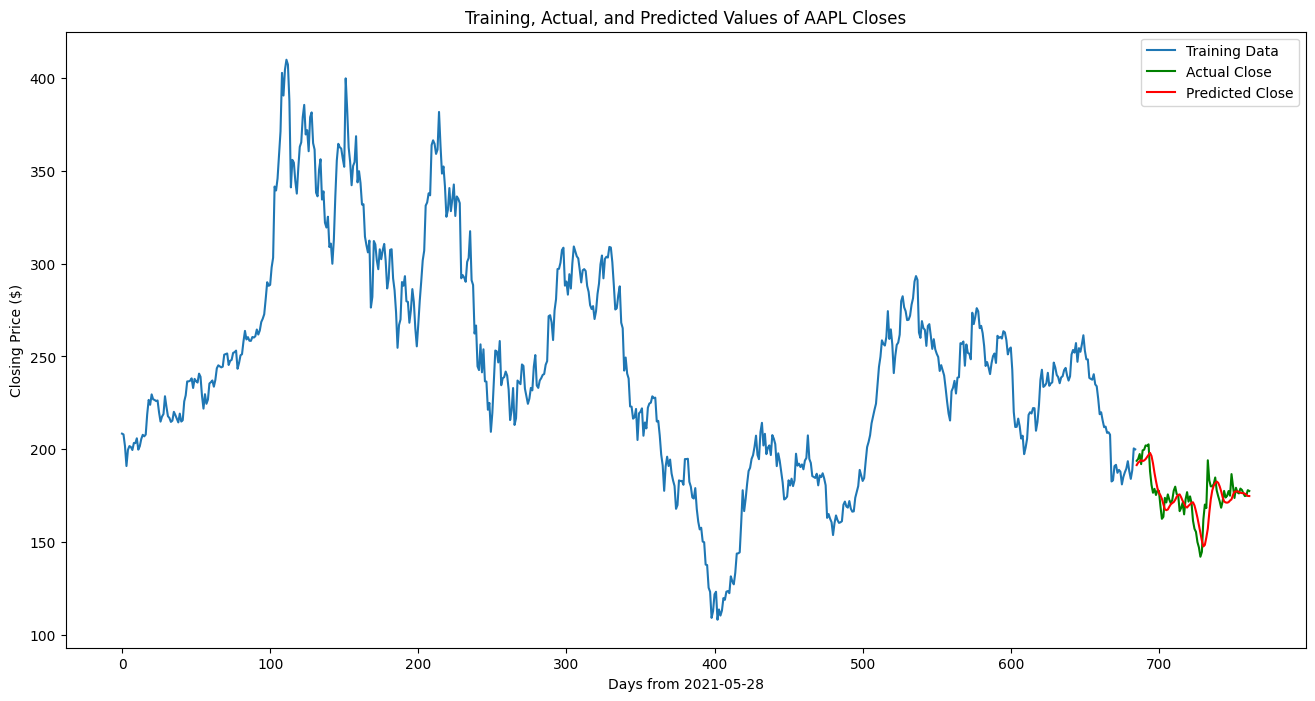

In [44]:
# plotting the AAPL testing data and predictions
df_training_closes = df_close[:df_training_size]
df_actual_closes = df_close[df_training_size:].copy()
df_actual_closes['predictions'] = df_testing_predictions
plt.figure(figsize=(16, 8))
plt.plot(df_training_closes['Close'])
plt.plot(df_actual_closes['Close'], color='green')
plt.plot(df_actual_closes['predictions'], color='red')
plt.title('Training, Actual, and Predicted Values of AAPL Closes')
plt.xlabel(f'Days from {start_date}')
plt.ylabel('Closing Price ($)')
plt.legend(('Training Data', 'Actual Close', 'Predicted Close'))
plt.show()

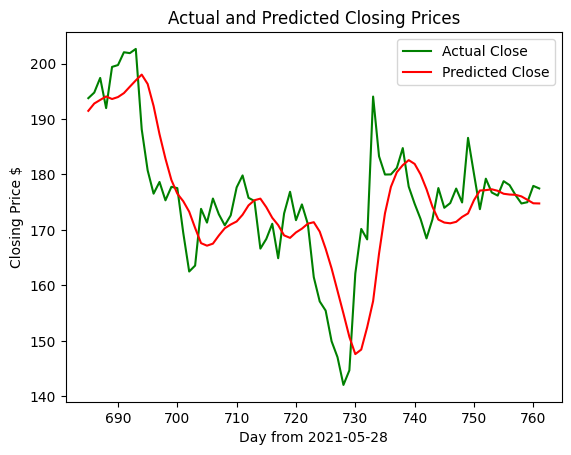

In [45]:
# plotting the actual vs predicited closing prices
df_actual_closes.plot(color=['green', 'red'])
plt.title('Actual and Predicted Closing Prices')
plt.xlabel(f'Day from {start_date}')
plt.ylabel('Closing Price $')
plt.legend(('Actual Close', 'Predicted Close'))
plt.show()

LSTM explanation: 

“Close” values is extracted from the DataFrame made into array 
The data is split into training (90%) and test (10%) sets.
A step size of 70 is defined (used for creating sequences of data).

The data is scaled between 0 and 1 using MinMaxScaler - sklearn 
Training and test data are sorted.

Creates arrays of training X and Y data.
X data: Sequences of 70 previous “Close” values.
Y data: The next “Close” value.

Create arrays of test X data (similar to training data).

Reshape the X data to match the LSTM input shape (samples, time steps, features).

Creates an LSTM model with 128 neurons (returning sequences) and another layer with 64 neurons.
Add Dense layers for output.
    Dense builds layers for the network???
Compile the model using the Adam optimizer and mean squared error loss.
    Adam optimizer - optimization algorithim?? 

Get predictions for the test data.
Inverse transform the scaled predictions to get actual values.


In [60]:
len(df_y_testing)


77

In [74]:
new_input = df_y_testing[7:].reshape(1, -1)
new_input.shape

(1, 70)

In [77]:
temp_input = list(new_input)
temp_input = temp_input[0].tolist()


In [81]:
from numpy import array 

output = []
i = 0 

while(i<70): 

    if(len(temp_input)>70): 
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i, new_input))
        new_input = new_input.reshape(1, -1)
        new_input = new_input.reshape((1, step, 1))
        yhat = df_model.predict(new_input, verbose=0)
        print("{} day input {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        output.extend(yhat.tolist())
        i = i+1
    else: 
        new_input = new_input.reshape((1, step, 1))
        yhat = df_model.predict(new_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        output.extend(yhat.tolist())
        i = i+1


0 day input [[[201.88]
  [202.64]
  [188.14]
  [180.74]
  [176.54]
  [178.65]
  [175.34]
  [177.77]
  [177.54]
  [169.48]
  [162.5 ]
  [163.57]
  [173.8 ]
  [171.32]
  [175.66]
  [172.82]
  [170.83]
  [172.63]
  [177.67]
  [179.83]
  [175.79]
  [175.22]
  [166.63]
  [168.38]
  [171.11]
  [164.9 ]
  [172.98]
  [176.88]
  [171.76]
  [174.6 ]
  [171.05]
  [161.48]
  [157.11]
  [155.45]
  [149.93]
  [147.05]
  [142.05]
  [144.68]
  [162.13]
  [170.18]
  [168.29]
  [194.05]
  [183.28]
  [179.99]
  [180.01]
  [181.19]
  [184.76]
  [177.81]
  [174.72]
  [171.97]
  [168.47]
  [171.89]
  [177.55]
  [173.99]
  [174.84]
  [177.46]
  [174.95]
  [186.6 ]
  [180.11]
  [173.74]
  [179.24]
  [176.75]
  [176.19]
  [178.79]
  [178.08]
  [176.29]
  [174.77]
  [175.  ]
  [177.94]
  [177.48]]]
0 day input [[5.462169]]
1 day input [[[201.88]
  [202.64]
  [188.14]
  [180.74]
  [176.54]
  [178.65]
  [175.34]
  [177.77]
  [177.54]
  [169.48]
  [162.5 ]
  [163.57]
  [173.8 ]
  [171.32]
  [175.66]
  [172.82]
  [

In [83]:
day_new = np.arange(1, 71)
day_pred = np.arange(71, 141)

In [95]:
df2 = df_scaler.fit_transform(np.array(df_close).reshape(-1, 1))
df3 = df2.tolist()
df3.extend(output)

In [104]:
plt.plot(day_new, df_scaler.inverse_transform(df_close_data[1025:]))
plt.plot(day_pred, df_scaler.inverse_transform(output))

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [46]:
## creating an ACTUAL forecast of the future with LSTM model, 100% of data will be training, and creating a future prediction. 
# Needs to be within 3 year constraint for easier streamlit use
# fc_df_.... - stands for forecast because this part is an actual forecasting of the data. 

# Assuming df is your dataframe with stock prices
fc_df_size = len(df_close_data)
step = 70


In [47]:
# scale the data between 0 and 1, sort the training and test data
fc_df_scaler = MinMaxScaler(feature_range = (0,1))
fc_df_scaled_data = fc_df_scaler.fit_transform(df_close_data)

fc_df_training_data = df_scaled_data[0:fc_df_size, :]


In [54]:
# Prepare training data using all the available data
fc_df_x_training = []
fc_df_y_training = []

for i in range(step, len(fc_df_scaled_data)):
    fc_df_x_training.append(fc_df_scaled_data[i-step:i, 0])
    fc_df_y_training.append(fc_df_scaled_data[i, 0])

fc_df_x_training = np.array(fc_df_x_training)
fc_df_y_training = np.array(fc_df_y_training)

fc_df_x_training = np.reshape(fc_df_x_training, (fc_df_x_training.shape[0], fc_df_x_training.shape[1], 1))
fc_df_y_training

array([0.47434326, 0.47543645, 0.45490874, 0.46234041, 0.46398549,
       0.47650744, 0.47778845, 0.48054891, 0.44817305, 0.458343  ,
       0.47221221, 0.47408918, 0.49700202, 0.51574088, 0.50050253,
       0.50464339, 0.49820552, 0.49791864, 0.50488621, 0.50384835,
       0.50623348, 0.5182254 , 0.50925895, 0.51638122, 0.53159738,
       0.53751615, 0.54551065, 0.57279624, 0.60269884, 0.59625004,
       0.59793951, 0.62907874, 0.64639315, 0.77357803, 0.76647795,
       0.78793289, 0.83119654, 0.87200881, 0.97645775, 0.93605426,
       0.98227714, 1.        , 0.99136483, 0.92604996, 0.77207639,
       0.82115911, 0.81625634, 0.78303011, 0.76091264, 0.80656143,
       0.84441415, 0.85255242, 0.89747242, 0.91934707, 0.86652102,
       0.87421738, 0.83658529, 0.89739524, 0.90597509, 0.85102859,
       0.83954451, 0.7626571 , 0.75607613, 0.80327061, 0.82227449,
       0.75032299, 0.76493192, 0.70903601, 0.70031239, 0.7196144 ,
       0.66542982, 0.67166893, 0.63563786, 0.67824991, 0.75592

In [66]:
#LSTM architecture

fc_df_model = Sequential()
fc_df_model.add(InputLayer(shape=(fc_df_x_training.shape[1], 1)))
fc_df_model.add(LSTM(n, return_sequences=True))
fc_df_model.add(LSTM(n2, return_sequences=False))
fc_df_model.add(Dense(25))
fc_df_model.add(Dense(1))

fc_df_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 70, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
fc_df_model.compile(optimizer='adam', loss='mean_squared_error')

fc_df_model.fit(fc_df_x_training, fc_df_y_training, batch_size=1, epochs=1)

692/692 ━━━━━━━━━━━━━━━━━━━━ 48s 66ms/step - loss: 0.0107


In [71]:
# Making predictions for the next 'n' days
future_days = 70  # for example, predicting the next 7% of 3 years 
future_predictions = []

last_sequence = fc_df_scaled_data[-step:]

for days in range(future_days):
    prediction = fc_df_model.predict(last_sequence.reshape(1, step, 1))
    future_predictions.append(prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], prediction, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━

In [72]:
# Inverse transform the predictions to get actual prices
future_predictions = df_scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate x values for plotting
total_days = len(df_close_data)
future_x_values = range(total_days, total_days + future_days)


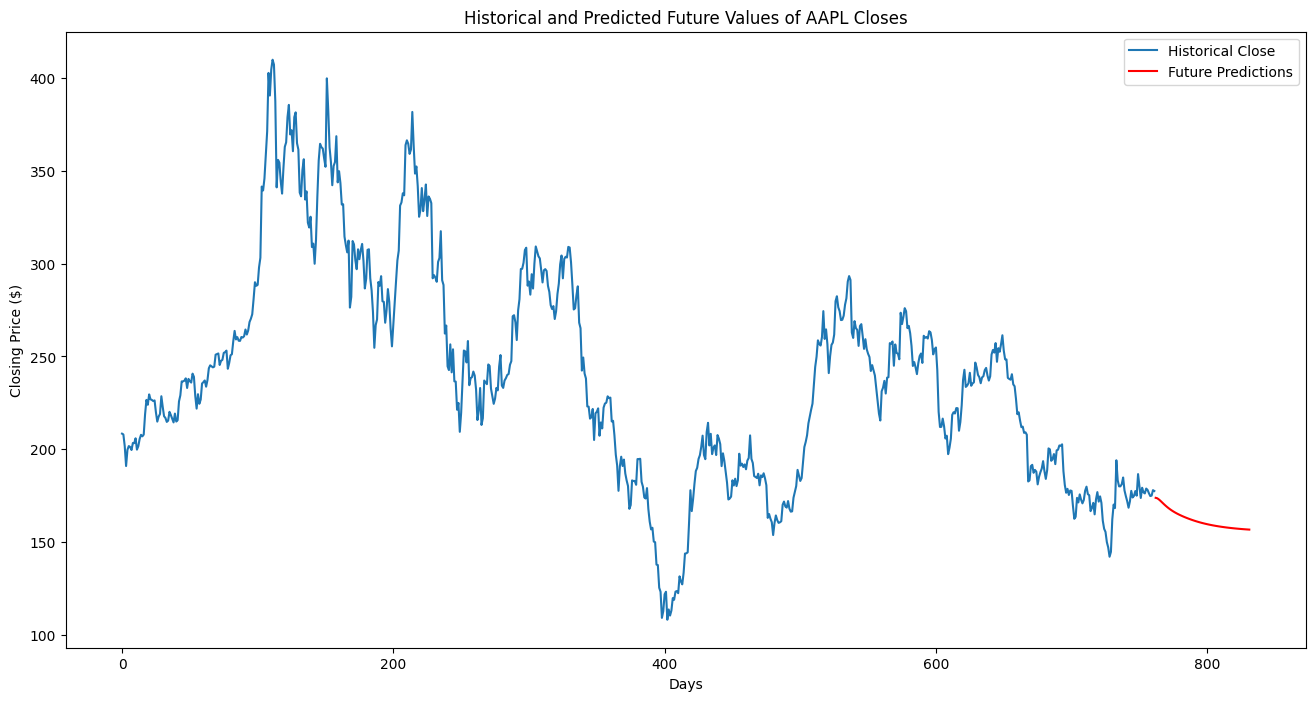

In [73]:
# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(range(total_days), df_close['Close'], label='Historical Close')
plt.plot(future_x_values, future_predictions, color='red', label='Future Predictions')
plt.title('Historical and Predicted Future Values of AAPL Closes')
plt.xlabel('Days')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.show()